<p><a name="sections"></a></p>


# Sections

- <a href="#DS">Data Structure</a><br>
- <a href="#DM">Data Manipulation</a><br>
- <a href="#miss">Handling Missing Data</a><br>
- <a href="#grouping">Grouping and aggregration</a><br>
- <a href="#time">Time Series</a><br>
- <a href="#sol">Solutions</a><br>

# Pandas

<p><a name="DS"></a></p>
### Data Structure

- Pandas is a Python package built on top of NumPy.  It is particularly strong in the area of handling spreadsheet structures, dealing with missing data, and processing time series data.

- We will talk about three data structure objects in today's lecture: Series, DataFrame and Time Series.

These are the new data types introduced by pandas:

- **Series**: 1D labeled homogeneously-typed array.
- **DataFrame**: General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns.
- **Time Series**: Series with index containing datetimes.

Import the package, as follows:

In [1]:
import numpy as np
import pandas as pd

<p><a name="series"></a></p>
## Series

- A series is a one-dimensional array-like object containing homogenously typed elements.   
- Each element has an associated data label, called its index. By default, the index consists of ordinary array indices, i.e. consecutive integers starting from zero.

In [2]:
obj = pd.Series(['a', 'b', 'c', 'd'])
obj

0    a
1    b
2    c
3    d
dtype: object

In [3]:
obj.index  #this is the default index

RangeIndex(start=0, stop=4, step=1)

- An entry can be retrieved using the index, as follows:

In [5]:
obj[0]

'a'

- Often it will be more desirable to create a series with a custom index. 
- Here the index is manually set the index from 1 to 4, with 4 repeated. Note there are two rows with the same index 4.

In [6]:
obj2 = pd.Series(['a', 'b', 'c', 'd','e'], index=[1, 2, 3, 4, 4])
obj2

1    a
2    b
3    c
4    d
4    e
dtype: object

- Calling that entry gives both values.  In this way a series is different from a dictionary.

In [7]:
obj2.index #custom index

Int64Index([1, 2, 3, 4, 4], dtype='int64')

In [8]:
obj2[4]

4    d
4    e
dtype: object

- The index value may also be a string.  A new entry with a string index is written:

In [9]:
obj2['something']=660
obj2

1              a
2              b
3              c
4              d
4              e
something    660
dtype: object

- Note the entries are not retrievable by their place but the value of their index.

In [10]:
print(obj[1])
print(obj2[5]) # This one also works
print(obj2[6]) # KeyError

b
660


IndexError: index out of bounds

- The attribute `values` returns all the values.
- Under the hood, the so-called "attribute" **values** is in fact a python **property**.

In [11]:
obj2.values

array(['a', 'b', 'c', 'd', 'e', 660], dtype=object)

In [12]:
obj2.values[1]   # obj.values is simply an array 

'b'

- The **Series** object is similar to a **dictionary**, `Series.index` is like `dictionary.keys`, and `Series.values` is like `dictionary.values`. Directly convert a dictionary to a Series, as follows:

In [13]:
dict_ = {1: 'a', 2: 'b', 3: 'c', 4: 'd'}
obj3 = pd.Series(dict_)
obj3

1    a
2    b
3    c
4    d
dtype: object

Convert a Series back to a dictionary.

In [14]:
obj3.to_dict()

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

Note what happens in translating a series with repeated index values.  Only the last entry for the repeated index is included in the dictionary.

In [15]:
obj2.to_dict()

{'something': 660, 1: 'a', 2: 'b', 3: 'c', 4: 'e'}

<p><a name="DF"></a></p>
## DataFrame

- A data frame represents a tabular, spreadsheet-like data structure containing an ordered collection of columns.
- Each column can be a different type (integers, strings, floating point numbers, Python objects, etc.).  
- All columns must be the same length, to give the data frame a defined shape.

In [16]:
data = {'commodity': ['Gold', 'Gold', 'Silver', 'Silver'],
        'year': [2013, 2014, 2014, 2015],
        'production_Moz': [107.6, 109.7, 868.3, 886.7]} #world wide in million oz

# convert to DataFrame
df = pd.DataFrame(data)
df

,commodity,production_Moz,year
0,Gold,107.6,2013
1,Gold,109.7,2014
2,Silver,868.3,2014
3,Silver,886.7,2015


In [17]:
df.columns 

Index(['commodity', 'production_Moz', 'year'], dtype='object')

In [18]:
df.index #standard index

RangeIndex(start=0, stop=4, step=1)

In [19]:
df.index=([4,5,6,7])
df

,commodity,production_Moz,year
4,Gold,107.6,2013
5,Gold,109.7,2014
6,Silver,868.3,2014
7,Silver,886.7,2015


In [20]:
df.index #custom integer index

Int64Index([4, 5, 6, 7], dtype='int64')

- The index may be set using the method `set_index`, as follows:

In [21]:
df=df.set_index('commodity')
df

,production_Moz,year
commodity,,
Gold,107.6,2013
Gold,109.7,2014
Silver,868.3,2014
Silver,886.7,2015


In [21]:
df.index #custom string index

Index(['Gold', 'Gold', 'Silver', 'Silver'], dtype='object', name='commodity')

In [22]:
#floats can also be an index
df.set_index('production_Moz').index 

Float64Index([107.6, 109.7, 868.3, 886.7], dtype='float64', name='production_Moz')

In [23]:
df

,production_Moz,year
commodity,,
Gold,107.6,2013
Gold,109.7,2014
Silver,868.3,2014
Silver,886.7,2015


In [24]:
df['year'] #this yields a pandas series

commodity
Gold      2013
Gold      2014
Silver    2014
Silver    2015
Name: year, dtype: int64

In [25]:
df[['year']] #this yields a pandas data frame

,year
commodity,
Gold,2013
Gold,2014
Silver,2014
Silver,2015


- The dataframe can restore the original index using the mathod `reset_index`, as follows:

In [26]:
df = df.reset_index()
df

,commodity,production_Moz,year
0,Gold,107.6,2013
1,Gold,109.7,2014
2,Silver,868.3,2014
3,Silver,886.7,2015


- A data frame can also be created with a nested list. The two ways are equivalent.

In [27]:
df_2=pd.DataFrame([[107.6, 'Gold', 2013],
                   [109.7, 'Gold', 2014],
                   [868.3, 'Silver', 2014],
                   [886.7, 'Silver', 2015]], 
                    columns=['production_Moz','commodity','year'])
df_2

,production_Moz,commodity,year
0,107.6,Gold,2013
1,109.7,Gold,2014
2,868.3,Silver,2014
3,886.7,Silver,2015


- A data frame has an attribute **values** (more accurately, a **property**), which is of the multidimensional array type.

In [28]:
df.values?

In [29]:
print(df.values)
print('-'*55)
print(df_2.values)

[['Gold' 107.6 2013]
 ['Gold' 109.7 2014]
 ['Silver' 868.3 2014]
 ['Silver' 886.7 2015]]
-------------------------------------------------------
[[107.6 'Gold' 2013]
 [109.7 'Gold' 2014]
 [868.3 'Silver' 2014]
 [886.7 'Silver' 2015]]


- data frame v.s. series is similar to 2D array v.s. 1D array. A data frame has column names for the additional dimension.

In [29]:
print(type(df.columns))

<class 'pandas.core.indexes.base.Index'>


In [31]:
print(df.columns)  # column name

Index(['commodity', 'production_Moz', 'year'], dtype='object')


In [30]:
df.columns.tolist()

['commodity', 'production_Moz', 'year']

- Each column in a DataFrame can be retrieved as a Series. 
- There are two ways to get the column: to retrieve by attribute and to retrieve by dictionary-like notation.

In [31]:
df.year         # retrieve by attribute

0    2013
1    2014
2    2014
3    2015
Name: year, dtype: int64

In [32]:
df['year']  # retrieve by dictionary-like notation

0    2013
1    2014
2    2014
3    2015
Name: year, dtype: int64

- The name of an individual column may be changed as follows:

In [33]:
df.columns=['commodity', 'com','production']
df

,commodity,com,production
0,Gold,107.6,2013
1,Gold,109.7,2014
2,Silver,868.3,2014
3,Silver,886.7,2015


In [34]:
dir(df.columns.str)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 '_freeze',
 '_is_categorical',
 '_make_accessor',
 '_orig',
 '_wrap_result',
 'capitalize',
 'cat',
 'center',
 'contains',
 'count',
 'decode',
 'encode',
 'endswith',
 'extract',
 'extractall',
 'find',
 'findall',
 'get',
 'get_dummies',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'len',
 'ljust',
 'lower',
 'lstrip',
 'match',
 'normalize',
 'pad',
 'partition',
 'repeat',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'slice',
 'slice_replace',
 'split',
 'startswith'

In [35]:
df.columns = df.columns.str.replace('com','metal')
df

,metalmodity,metal,production
0,Gold,107.6,2013
1,Gold,109.7,2014
2,Silver,868.3,2014
3,Silver,886.7,2015


- Indexing a pandas data frame is similar to indexing a numpy array. In pandas the first index retrieves a column and the second index retrieves the row.  
- To return the third element of the metal column, use the following:

In [36]:
df['metal'][2]

868.3

- Slicing a pandas data frame is also similar to slicing a numpy array.  The following code returns the second and third elements of the production column.

In [37]:
df['production'][1:3]

1    2014
2    2014
Name: production, dtype: int64

- In order to slice multiple columns pass a list of column names.  The following represents the world production of gold and silver in 2014.

In [38]:
df[['metal','production']][1:3]

,metal,production
1,109.7,2014
2,868.3,2014


** Exercise 1** 

Create a Pandas DataFrame, named 'NYC', whose columns are 'boro', 'pop' and 'area'. The frame represents the five boroughs of New York City, including the 2010 census population (in millions),and land area in square miles.  The rows represent the following:

- The Bronx is 42 square miles.  In the 2010 census, the Bronx had 1.39 million people.
- Manhattan, with 2010 population 1.59 million, has an area of 23 square miles.
- Brooklyn is 71 square miles.  The 2010 population was 2.47 million.
- In 2010, Staten Island had 0.44 million inhabitants.  It is 59 square miles.
- 2.23 million people lived across the 109 square miles of Queens, in 2010.

Create a new column representing the population density using:
```
NYC['density']=NYC['pop']/NYC['area']
```

Now set the index of NYC to be the borough names using `set_index` function of a data frame. Make sure to update the data frame.

In [39]:
#### Your code here
boro = ['Bronx', 'Manhattan', 'Brooklyn', 'Staten Island', 'Queens']
pop  = [1.39e6,1.59e6,2.47e6,0.44e6,2.23e6]
area = [42, 23, 71, 59, 109]

,area,pop,density
boro,,,
Bronx,42,1390000.0,33095.238095
Manhattan,23,1590000.0,69130.434783
Brooklyn,71,2470000.0,34788.732394
Staten Island,59,440000.0,7457.627119
Queens,109,2230000.0,20458.715596


<p><a name="IO"></a></p>
## I/O tools

- Pandas has a number of functions for reading tabular data as a data frame object.

In [40]:
!cat foo.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [41]:
!type foo.csv # Windows user

/bin/sh: line 0: type: foo.csv: not found


In [42]:
pd.read_csv('foo.csv')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- In some cases, there is no header in the file. By setting `header = None`, the column names will be filled with incremental numbers.

In [43]:
!cat foo_noheader.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [44]:
my_df=pd.read_csv('foo_noheader.csv', header = None)
print(my_df)
my_df.index

   0   1   2   3      4
0  1   2   3   4  hello
1  5   6   7   8  world
2  9  10  11  12    foo


RangeIndex(start=0, stop=3, step=1)

- The column names may then be set, as follows:

In [45]:
my_df.columns=['a', 'b', 'c', 'd', 'message']
my_df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- Another way is to pass the column names (as a list of strings) to the `names` parameter in `read_csv`.  
- Note the parameter is called "names" instead of "columns".

In [46]:
# Set the names manually
pd.read_csv('foo_noheader.csv', 
             names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- Importing files has been covered. This exercise demonstrates file exporting.

**Exercise 2** 

- Write the data frame, `NYC`, to a file, NYC.csv. The function `to_csv` is useful for this task.
- Now load 'NYC.csv' to a data frame named NYC2.

In [47]:
#### Your code here


In [48]:
NYC

,area,pop,density
boro,,,
Bronx,42,1390000.0,33095.238095
Manhattan,23,1590000.0,69130.434783
Brooklyn,71,2470000.0,34788.732394
Staten Island,59,440000.0,7457.627119
Queens,109,2230000.0,20458.715596


In [50]:
!cat NYC.csv

boro,area,pop,density
Bronx,42,1390000.0,33095.23809523809
Manhattan,23,1590000.0,69130.43478260869
Brooklyn,71,2470000.0,34788.7323943662
Staten Island,59,440000.0,7457.627118644068
Queens,109,2230000.0,20458.715596330276


In [49]:
NYC2=pd.read_csv('NYC.csv', index_col=0) # use the first column as index
NYC2

,area,pop,density
boro,,,
Bronx,42,1390000.0,33095.238095
Manhattan,23,1590000.0,69130.434783
Brooklyn,71,2470000.0,34788.732394
Staten Island,59,440000.0,7457.627119
Queens,109,2230000.0,20458.715596


<p><a name="DM"></a></p>
# Data Manipulation in Pandas

- Like numpy, pandas defines many broadcast operations, as well as numerous methods of manipulating data.

<p><a name="concat"></a></p>
### concat
Pandas DataFrames can be expanded in both directions. First create two data frames.

In [50]:
df1 = pd.DataFrame(np.arange(9).reshape((3, 3)), 
                   columns=['a', 'b', 'c'],
                   index=['one', 'two', 'three'])
df2 = pd.DataFrame(np.arange(6).reshape((3, 2)), 
                   columns=['d','e'],
                   index=['three', 'two','one'])
df1

,a,b,c
one,0,1,2
two,3,4,5
three,6,7,8


In [51]:
df2

,d,e
three,0,1
two,2,3
one,4,5


- Since the two data frames have the same number of rows, it is natural to combine them "horizontally".  
- Note the concatenation takes place on the name of the index and not the order.

In [52]:
pd.concat([df1, df2], axis = 1)

,a,b,c,d,e
one,0,1,2,4,5
three,6,7,8,0,1
two,3,4,5,2,3


In [53]:
np.hstack((df1.values, df2.values))

array([[0, 1, 2, 0, 1],
       [3, 4, 5, 2, 3],
       [6, 7, 8, 4, 5]])

- More generally the **np.concatenate** can **glue** two arrays along a specified axies.

- The argument "axis = 1" means expanding along the column indices. Setting "axis = 0" will combine two data frames with same number of columns vertically. 

- Now changing the name of row 'one' to One' gives it a different index.  In this case the concatenation will use all the rows, filling in missing values with NaN.

In [54]:
df1 = pd.DataFrame(np.arange(9).reshape((3, 3)), 
                   columns=['a', 'b', 'c'],
                   index=['One', 'two', 'three'])
df2 = pd.DataFrame(np.arange(6).reshape((3, 2)), 
                   columns=['d','e'],
                   index=['three', 'two','one'])
print(df1,'\n\n',df2)

       a  b  c
One    0  1  2
two    3  4  5
three  6  7  8 

        d  e
three  0  1
two    2  3
one    4  5


In [55]:
pd.concat([df1, df2], axis = 1)

,a,b,c,d,e
One,0.0,1.0,2.0,NaN,NaN
one,NaN,NaN,NaN,4.0,5.0
three,6.0,7.0,8.0,0.0,1.0
two,3.0,4.0,5.0,2.0,3.0


- To include only the shared rows, set the join parameter to 'inner', as following:

In [58]:
pd.concat([df1, df2], axis = 1, join='inner')

,a,b,c,d,e
two,3,4,5,2,3
three,6,7,8,0,1


**Exercise 3**

In the jupyter notebook, create the data frame below.  Observe that this is a data frame with new features.  

There are three new features:

- **high_point** is the location of highest elevation 
- **geography** indicates if the borough is an island, on an island, or mainland
- **inception** indicates the year of incorporation into the City of New York

Combine 'new_features' with the old NYC data frame to make a new data frame named 'NYC3'.

In [56]:
new_features = pd.DataFrame({'high_point': ['Battle Hill', 'Chapel Farm', 'North Glen Oaks', 'Bennett Park','Todt Hill'],\
                            'geography':['on island','on mainland','on island','is an island','is an island'],\
                           'inception':['1634','1898','1683','1624','1683']},\
                            index=['Brooklyn', 'Bronx', 'Queens', 'Manhattan',"Staten Island"])
new_features

,geography,high_point,inception
Brooklyn,on island,Battle Hill,1634
Bronx,on mainland,Chapel Farm,1898
Queens,on island,North Glen Oaks,1683
Manhattan,is an island,Bennett Park,1624
Staten Island,is an island,Todt Hill,1683


In [57]:
#### Your code here (Notice that the pd.concat will re-align the row index automatically.)


,area,pop,density,geography,high_point,inception
Bronx,42,1390000.0,33095.238095,on mainland,Chapel Farm,1898
Brooklyn,71,2470000.0,34788.732394,on island,Battle Hill,1634
Manhattan,23,1590000.0,69130.434783,is an island,Bennett Park,1624
Queens,109,2230000.0,20458.715596,on island,North Glen Oaks,1683
Staten Island,59,440000.0,7457.627119,is an island,Todt Hill,1683


<p><a name="sort"></a></p>
### sort
- It is possible to order the rows of data frames using `sort_values()`.  This object method takes a column name as an argument.
- It is used on the new_features data frame to order by date of inception, as follows:


In [58]:
new_features.sort_values('inception')

,geography,high_point,inception
Manhattan,is an island,Bennett Park,1624
Brooklyn,on island,Battle Hill,1634
Queens,on island,North Glen Oaks,1683
Staten Island,is an island,Todt Hill,1683
Bronx,on mainland,Chapel Farm,1898


By default the sort is done in ascending order.  To apply the sort in decending order, set the `ascending` parameter to `False`.

In [59]:
new_features.sort_values('inception',ascending=False)

,geography,high_point,inception
Bronx,on mainland,Chapel Farm,1898
Queens,on island,North Glen Oaks,1683
Staten Island,is an island,Todt Hill,1683
Brooklyn,on island,Battle Hill,1634
Manhattan,is an island,Bennett Park,1624


<p><a name="merge"></a></p>
### merge
Merging is the most common way to combine multiple data frames. Create two data frames first.

In [60]:
df3 = pd.DataFrame([['a','b','c'],['d','e','f'],['g','h','i']]\
                   ,columns=['col1','col2','col3'])
df4 = pd.DataFrame({'col2':['x','e','b','z'],'col4':[1,2,3,4],'col5':['i','f','e','h']})
df3

,col1,col2,col3
0,a,b,c
1,d,e,f
2,g,h,i


In [61]:
df4

,col2,col4,col5
0,x,1,i
1,e,2,f
2,b,3,e
3,z,4,h


- Merging will use the **`on`** column as a key for the merge.  The code below identifies the column ‘col2’ from both data frames. 
- The argument **`how`** set to 'inner' makes the merge only keep rows occuring in both data frames.

In [62]:
pd.merge(df3, df4, how='inner', on ='col2')

,col1,col2,col3,col4,col5
0,a,b,c,3,e
1,d,e,f,2,f


- The default value of the parameter `how` is 'inner'. The following code performs the same task as above.

In [63]:
pd.merge(df3, df4, on ='col2')

,col1,col2,col3,col4,col5
0,a,b,c,3,e
1,d,e,f,2,f


- To keep every row in df1 then set the parameter `how` = 'left'.

In [64]:
pd.merge(df3, df4, how='left', on ='col2')

,col1,col2,col3,col4,col5
0,a,b,c,3.0,e
1,d,e,f,2.0,f
2,g,h,i,NaN,NaN


- To keep all rows from both df1 and df2, set the parameter `how` = 'outer'.

In [68]:
pd.merge(df3, df4, how='outer', on ='col2')

,col1,col2,col3,col4,col5
0,a,b,c,3.0,e
1,d,e,f,2.0,f
2,g,h,i,NaN,NaN
3,NaN,x,NaN,1.0,i
4,NaN,z,NaN,4.0,h


- If the `on` column does not have the same name in the two data frames, use 'left_on' and 'right_on' to indicate how to perform the merge.  
- Note that columns with the same name, in the two data frames, will be named with an x or y character appended.

In [69]:
pd.merge(df3, df4, left_on='col2', right_on='col5')

,col1,col2_x,col3,col2_y,col4,col5
0,d,e,f,b,3,e
1,g,h,i,z,4,h


**Exercise 4**

- Run the following code to create a data frame, 'Elevations'. It contains NYC locations and their elevation in feet.  How is this related to the NYC data frame? Why separate this information into another data frame?
- Combine this data with the full NYC3 data frame to make a new data frame named NYC4.
- Note NYC3 is indexed using boro, we want to keep it after the merge.
- Change the name of the elevation column to 'peak_elevation'.
- Order the data frame by highest to lowest 'peak_elevation'.

In [66]:
Elevations = pd.DataFrame([['Battle Hill',220],['Marcus Garvey Park',103],['Bennett Park',265],\
                           ['Todt Hill',410],['Washington Square Park',27],['Chapel Farm',280],\
                           ['Bryant Park',58],['North Glen Oaks',258],['St Marys Park',47]],
                      columns=['location', 'elevation'])
Elevations

,location,elevation
0,Battle Hill,220
1,Marcus Garvey Park,103
2,Bennett Park,265
3,Todt Hill,410
4,Washington Square Park,27
5,Chapel Farm,280
6,Bryant Park,58
7,North Glen Oaks,258
8,St Marys Park,47


In [73]:
# Your code here


,area,pop,density,geography,high_point,inception,location,peak_elevation
index,,,,,,,,
Brooklyn,71,2470000.0,34788.732394,on island,Battle Hill,1634,Battle Hill,220
Queens,109,2230000.0,20458.715596,on island,North Glen Oaks,1683,North Glen Oaks,258
Manhattan,23,1590000.0,69130.434783,is an island,Bennett Park,1624,Bennett Park,265
Bronx,42,1390000.0,33095.238095,on mainland,Chapel Farm,1898,Chapel Farm,280
Staten Island,59,440000.0,7457.627119,is an island,Todt Hill,1683,Todt Hill,410


<p><a name="SF"></a></p>
### selection and filter

- The `loc` method provides purely label (index/columns)-based indexing. 
- This method allows selection from a data frame by index and columns. 

In [74]:
df1

,a,b,c
One,0,1,2
two,3,4,5
three,6,7,8


The following returns a single column of df1.

In [75]:
df1['a'] #gives series

One      0
two      3
three    6
Name: a, dtype: int64

In [76]:
df1[1] #this throws an error

KeyError: 1

In [77]:
type(df1['a'])

pandas.core.series.Series

In [78]:
df1[['a']] #gives a single column data frame

,a
One,0
two,3
three,6


In [79]:
df1[['a','c']] #gives a multi column data frame

,a,c
One,0,2
two,3,5
three,6,8


- The following uses `loc` to return a single row of df1, using the index string name.

In [80]:
df1.loc['two'] # the row that has index two

a    3
b    4
c    5
Name: two, dtype: int64

In [79]:
df1.loc[['two']] # the row that has index two

,a,b,c
two,3,4,5


- A second parameter is passed to loc to specify the chosen column. For example:

In [81]:
df1.loc['two', 'b'] # the row that has index two and column b

4

- Note the two ways to accomplish this:

In [83]:
print(df1.loc['two', 'b'])
print(df1['b'][1])

4
4


- Fancy indexing can be done with `loc` in pandas, as was done in Numpy. Select a row with a condition, as follows. 
- The code below returns all columns for the rows in which column 'a' is zero.

In [84]:
df1.loc[df1.a==0,:]

,a,b,c
One,0,1,2


In [86]:
df1[df1.a==0]

,a,b,c
One,0,1,2


- Columns are selected in a similar way.  The code below returns all rows for the columns in which row 'one' is zero.

In [87]:
df1.loc[:, df1.loc['One']==0]

,a
One,0
two,3
three,6


- Note: loc only accepts labels as input. If you try to use numbers, it will give you an error. For example:

In [88]:
df1.loc[1, 2]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

- To select data by position number, use iloc. The iloc method provides a purely position based indexing.

In [89]:
# select as a matrix 
# row 2, col 3
df1.iloc[1, 2]

5

In [90]:
# first row, first two columns
# return a Series
row1 = df1.iloc[0,:2]
row1

a    0
b    1
Name: One, dtype: int64

- You can also use a list to slice the dataframe.

In [91]:
df1.iloc[[0,2], :2]

,a,b
One,0,1
three,6,7


In [92]:
NYC4 #look at NYC4 again

,area,pop,density,geography,high_point,inception,location,peak_elevation
index,,,,,,,,
Brooklyn,71,2470000.0,34788.732394,on island,Battle Hill,1634,Battle Hill,220
Queens,109,2230000.0,20458.715596,on island,North Glen Oaks,1683,North Glen Oaks,258
Manhattan,23,1590000.0,69130.434783,is an island,Bennett Park,1624,Bennett Park,265
Bronx,42,1390000.0,33095.238095,on mainland,Chapel Farm,1898,Chapel Farm,280
Staten Island,59,440000.0,7457.627119,is an island,Todt Hill,1683,Todt Hill,410


In [93]:
#get the i=2 and i=4 column of NYC4
NYC4.iloc[:,[2,4]]

,density,high_point
index,,
Brooklyn,34788.732394,Battle Hill
Queens,20458.715596,North Glen Oaks
Manhattan,69130.434783,Bennett Park
Bronx,33095.238095,Chapel Farm
Staten Island,7457.627119,Todt Hill


- DataFrame’s apply method applies a function on 1D arrays to each column or row.

In [94]:
df.apply?

In [95]:
df1.apply(lambda x: max(x), axis=0) # 0 stands for apply to each column

a    6
b    7
c    8
dtype: int64

In [96]:
df1.apply(lambda x: min(x), axis=1) # 1 stands for apply to each row

One      0
two      3
three    6
dtype: int64

- If you just want to apply the function to a single column, you can extract that specific series first and then call the `map()` method just like the `map` operator in Python. 

In [97]:
df1.a.map(lambda x: x+1)

One      1
two      4
three    7
Name: a, dtype: int64

### Removing data

In [100]:
#this removes row 'two'
df1.loc[df1.index != 'two']
#df1

,a,b,c
One,0,1,2
three,6,7,8


In [101]:
#this removes column 'a'
df1.drop('a', 1)

,b,c
One,1,2
two,4,5
three,7,8


- Rows and columns may also be removed using fancy indexing or `drop()`.

In [102]:
#this removes column b
df1.loc[:,df1.columns != 'b']

,a,c
One,0,2
two,3,5
three,6,8


In [103]:
# remember the following expression is a boolean and acts as a mask
df1.columns != 'b'

array([ True, False,  True])

In [104]:
#this removes column 'b'
df1.drop('b', axis=1)

,a,c
One,0,2
two,3,5
three,6,8


<p><a name="miss"></a></p>
# Handling Missing Data

- Missing or, equivalently, corrupt data is an unavoidable reality in processing large data sets.  There are various ways of dealing with it, depending upon the circumstances:
 - Discard it, and all related data.
 - Interpolate values from surrounding data
 - Isolate it and analyze it separately

- Which approach to use is a scientific question.  Whatever approach is chosen, pandas has computational methods to carry it out.
- Read a csv file that contains NaNs. **Note:** index_col is set to 0.  This means the first column is used as the index.

In [105]:
df_miss = pd.read_csv('missing.csv',index_col=0)
df_miss

,one,two,three,four
a,-1.250699,-0.573801,0.705961,-1.015682
b,NaN,-0.217766,0.655179,1.379276
c,-0.860359,-1.313747,0.676174,1.034417
d,NaN,NaN,NaN,NaN
e,0.079169,0.029138,0.239183,-0.492039
f,-1.149060,NaN,NaN,-0.160499


- To figure out where the missing data is, use the `isnull()` method.

In [106]:
df_miss.isnull()

,one,two,three,four
a,False,False,False,False
b,True,False,False,False
c,False,False,False,False
d,True,True,True,True
e,False,False,False,False
f,False,True,True,False


- How many missing values are there in the dataframe?

In [107]:
sum(df_miss.isnull()) # Built-in sum doesn't work

TypeError: unsupported operand type(s) for +: 'int' and 'str'

- Summing up the boolean array reports how many missing values are in each column.

In [108]:
np.sum(df_miss.isnull())

one      2
two      2
three    2
four     1
dtype: int64

- The same is possible for rows by setting the axis parameter to 1.

In [109]:
np.sum(df_miss.isnull(), axis=1)

a    0
b    1
c    0
d    4
e    0
f    2
dtype: int64

- To isolate the rows in which there are null values, aggregate the `df.isnull()` boolean data frame along rows, using `any` with `axis=1`.

In [110]:
mask=df_miss.isnull().any(axis=1)
mask

a    False
b     True
c    False
d     True
e    False
f     True
dtype: bool

- Passing the boolean Series to the first position of the `loc` method of the DataFrame selects the rows that have value equal to True:

In [111]:
df_miss.loc[mask,:]

,one,two,three,four
b,NaN,-0.217766,0.655179,1.379276
d,NaN,NaN,NaN,NaN
f,-1.14906,NaN,NaN,-0.160499


- Similarly, if you want to locate the rows that contains only missing values, you can use `all()`

In [112]:
mask=df_miss.isnull().all(axis=1)
mask

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

**Exercise 5**
- Handling NaNs has been shown, however, not all missing values are NaNs. Consider the example below:

```
Employee = pd.read_csv('Employee_continue.csv')
```

Print the data frame, looking for missing values by inspection. How many missing values are there? Some of the missing values might not be NaNs.

In [1]:
Employee = pd.read_csv('Employee_continue.csv')#, na_values=['?', np.nan])
Employee

,Department,Education,Sex,Title,Year,Name,Salary
0,IT,Bachelor,M,analyst,1.0,Bob,90.0
1,IT,Master,M,analyst,2.0,Jake,90.0
2,HR,Master,M,analyst,2.0,John,90.0
3,HR,Bachelor,F,analyst,2.0,Judy,90.0
4,Trade,PHD,M,associate,3.0,Sam,120.0
5,?,PHD,F,associate,5.0,Amy,120.0
6,Trade,Master,F,associate,NaN,Jennifer,120.0
7,HR,Master,M,VP,8.0,Peter,262.5
8,IT,?,F,VP,9.0,Mary,262.5


- See '?' in the data frame. For a small data frame like this the '?' may be replaced by `np.nan` manually. In dealing with a large data frame, it is more efficient to use the function `replace`. Use `replace` to swap '?' with `np.nan`.

In [119]:
#### Your code here


- How many missing values are there in each row? How many in each column?

In [2]:
#### Your code here


- Print the rows with missing values.

In [13]:
#### Your code here


,Department,Education,Sex,Title,Year,Name,Salary
5,NaN,PHD,F,associate,5.0,Amy,120.0
6,Trade,Master,F,associate,NaN,Jennifer,120.0
8,IT,NaN,F,VP,9.0,Mary,262.5


- Print the columns with missing values.

In [14]:
#### Your code here


,Department,Education,Year
0,IT,Bachelor,1.0
1,IT,Master,2.0
2,HR,Master,2.0
3,HR,Bachelor,2.0
4,Trade,PHD,3.0
5,NaN,PHD,5.0
6,Trade,Master,NaN
7,HR,Master,8.0
8,IT,NaN,9.0


Once all the missing values are represented by `NaN`s, Pandas provides various methods for handling them:

<p><a name="dropna"></a></p>
## dropna
- One option is to discard the rows with missing values. Below the arguments `axis=0` and `how='any'` indicate dropping *rows* with a NaN in *any* position.

In [111]:
df_miss

,one,two,three,four
a,-1.250699,-0.573801,0.705961,-1.015682
b,NaN,-0.217766,0.655179,1.379276
c,-0.860359,-1.313747,0.676174,1.034417
d,NaN,NaN,NaN,NaN
e,0.079169,0.029138,0.239183,-0.492039
f,-1.149060,NaN,NaN,-0.160499


In [112]:
df_miss.dropna(axis=0, how='any')
df_miss.dropna?

- Another option is to drop rows full of NaNs. This can be done with `how='all'`.

In [113]:
df_miss.dropna(axis=0, how='all')

,one,two,three,four
a,-1.250699,-0.573801,0.705961,-1.015682
b,NaN,-0.217766,0.655179,1.379276
c,-0.860359,-1.313747,0.676174,1.034417
e,0.079169,0.029138,0.239183,-0.492039
f,-1.149060,NaN,NaN,-0.160499


- Applying `dropna()` to the above data frame may be done once more. Drop a column with the argument `axis=1`.

In [114]:
df_miss.dropna(axis=0, how='all').dropna(axis=1, how='any')

,four
a,-1.015682
b,1.379276
c,1.034417
e,-0.492039
f,-0.160499


<p><a name="fillna"></a></p>
## fillna

- An alternative to discarding information is to **impute** the data. 
- This can be done with the `fillna()` function with the value to be imputed as the argument.

In [115]:
df_miss.fillna(0)

,one,two,three,four
a,-1.250699,-0.573801,0.705961,-1.015682
b,0.000000,-0.217766,0.655179,1.379276
c,-0.860359,-1.313747,0.676174,1.034417
d,0.000000,0.000000,0.000000,0.000000
e,0.079169,0.029138,0.239183,-0.492039
f,-1.149060,0.000000,0.000000,-0.160499


- Another common way to impute is by the mean of the column.

In [116]:
df_miss['one'].fillna(df_miss['one'].mean())

a   -1.250699
b   -0.795237
c   -0.860359
d   -0.795237
e    0.079169
f   -1.149060
Name: one, dtype: float64

<p><a name="interpolate"></a></p>
## Interpolate

- Interpolation is the insertion of new data between preeexisting fixed points. Linear interpolation uses a linear function to create new data point.  
- In pandas this is accomplished using `interpolate()` with the `method` parameter set to linear, `method='linear'`.  
- This will fill in missing data points with a linear interpolation between the data points bordering the missing values.

In [117]:
df_miss

,one,two,three,four
a,-1.250699,-0.573801,0.705961,-1.015682
b,NaN,-0.217766,0.655179,1.379276
c,-0.860359,-1.313747,0.676174,1.034417
d,NaN,NaN,NaN,NaN
e,0.079169,0.029138,0.239183,-0.492039
f,-1.149060,NaN,NaN,-0.160499


In [118]:
df_miss.interpolate(method='linear')

,one,two,three,four
a,-1.250699,-0.573801,0.705961,-1.015682
b,-1.055529,-0.217766,0.655179,1.379276
c,-0.860359,-1.313747,0.676174,1.034417
d,-0.390595,-0.642305,0.457679,0.271189
e,0.079169,0.029138,0.239183,-0.492039
f,-1.149060,0.029138,0.239183,-0.160499


- Since `df.loc['b','one']` is a NaN between `df.loc['a','one']` and `df.loc['c','one']`, the value inserted is the mean of them.
- Note how this technique treats NaN values at the bottom of a column.

In [119]:
(df_miss.loc['a', 'one'] + df_miss.loc['c', 'one'])/2

-1.0555289364489999

<p><a name="grouping"></a></p>

# Grouping and Aggregation

Grouping and  aggregation are critical components of data analysis which involve:

- **Splitting** data into groups based on some features.
- **Applying** a function to each group independently.
- **Combining** the result into data structure.

### Grouping

Grouping splits a data frame into categorical groups, according to a given variable, or set of variables.   Consider the following data frame.

In [17]:
Country = pd.read_csv('countries.csv', delimiter=';')
Country.head()

,Country,Country (de),Country (local),Country code,Continent,Capital,Population,Area,Coastline,Government form,Currency,Currency code,Dialing prefix,Birthrate,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,AF,Asia,Kabul,33332025,652230,0,Presidential islamic republic,Afghani,AFN,93,38.3,13.7,51.3,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,EG,Africa,Cairo,94666993,1001450,2450,Presidential republic,Pfund,EGP,20,30.3,4.7,72.7,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,AX,Europe,Mariehamn,29013,1580,0,Autonomous region of Finland,Euro,EUR,358,0.0,0.0,0.0,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,AL,Europe,Tirana,3038594,28748,362,parliamentary republic,Lek,ALL,355,13.1,6.7,78.3,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,DZ,Africa,Algiers,40263711,2381741,998,Presidential republic,Dinar,DZD,213,23.0,4.3,76.8,https://www.laenderdaten.info/Afrika/Algerien/...


In [18]:
#choose the desires columns
Country=Country[['Country','Continent','Population','Area','Coastline',
                'Currency','Birthrate','Deathrate','Life expectancy']]
#change the column names to lowercase
Country.columns = Country.columns.str.lower()
#drop columns with missing values (Antarctica)
Country=Country.dropna(axis=0, how='any')
#limit to countries with populations over 20 million
Country=Country[Country['population']>20e6]
#add a boolean valued column that is true for countries with coastlines
Country['coastal']=Country['coastline']!=0
Country

,country,continent,population,area,coastline,currency,birthrate,deathrate,life expectancy,coastal
0,Afghanistan,Asia,33332025,652230,0,Afghani,38.3,13.7,51.3,False
1,Egypt,Africa,94666993,1001450,2450,Pfund,30.3,4.7,72.7,True
4,Algeria,Africa,40263711,2381741,998,Dinar,23.0,4.3,76.8,True
7,Angola,Africa,20172332,1246700,1600,Kwanza,38.6,11.3,56.0,True
12,Argentina,South America,43886748,2780400,4989,Peso,17.0,7.5,77.1,True
16,Ethiopia,Africa,102374044,1104300,0,Birr,36.9,7.9,62.2,False
17,Australia,Australia,22992654,7741220,25760,Dollar,12.1,7.2,82.2,True
20,Bangladesh,Asia,156186882,143998,580,Taka,19.0,5.3,73.2,True
32,Brazil,South America,205823665,8514877,7491,Real,14.3,6.6,73.8,True
39,China,Asia,1373541278,9596960,14500,Yuan,12.4,7.7,75.5,True


- This will calculate the mean population.

In [19]:
Country['population'].mean()

112995987.12068966

- This will calculate the sum of all populations in Asia.

In [20]:
Country[Country['continent']=='Asia']['population'].sum()

4207906053

- This will return the number of land-locked countries in the data frame.

In [21]:
Country[Country['coastal']==False].country.count()

5

- To group the countries by continent, do the following:

In [22]:
group = Country.groupby('continent')
dir(group)[-60:-30]

['corr',
 'corrwith',
 'count',
 'country',
 'cov',
 'cumcount',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'currency',
 'deathrate',
 'describe',
 'diff',
 'dtypes',
 'expanding',
 'ffill',
 'fillna',
 'filter',
 'first',
 'get_group',
 'groups',
 'head',
 'hist',
 'idxmax',
 'idxmin',
 'indices',
 'last',
 'mad',
 'max']

- `group` is assigned the value returned by the `groupby` function, whose type is:

In [23]:
print(type(group))

<class 'pandas.core.groupby.DataFrameGroupBy'>


- The `DataFrameGroupBy` object is an `iterable`. Iterate over the object and print the contents, as follows:

In [24]:
for item in group:
    print(item)

('Africa',                               country continent  population     area  \
1                               Egypt    Africa    94666993  1001450   
4                             Algeria    Africa    40263711  2381741   
7                              Angola    Africa    20172332  1246700   
16                           Ethiopia    Africa   102374044  1104300   
44   Democratic Republic of the Congo    Africa    81331050  2344858   
51                        Ivory Coast    Africa    23740424   322463   
65                              Ghana    Africa    26908262   238533   
99                           Cameroon    Africa    24360803   475440   
104                             Kenya    Africa    46790758   580367   
125                        Madagascar    Africa    24430325   587041   
131                           Morocco    Africa    33655786   446550   
145                        Mozambique    Africa    25930150   799380   
156                           Nigeria    Africa   186

- Each `item` we print is a two element `tuple`. The first element is the grouping.  
- The second element is a data frame for that grouping. There is an alternative way of iterating through the groupby object, as follows:

In [25]:
for key, values in group:
    print(key) #this indicates the grouping
    print('-'*70)
    print(values) #this is a dataframe for that 
    print('\n')

Africa
----------------------------------------------------------------------
                              country continent  population     area  \
1                               Egypt    Africa    94666993  1001450   
4                             Algeria    Africa    40263711  2381741   
7                              Angola    Africa    20172332  1246700   
16                           Ethiopia    Africa   102374044  1104300   
44   Democratic Republic of the Congo    Africa    81331050  2344858   
51                        Ivory Coast    Africa    23740424   322463   
65                              Ghana    Africa    26908262   238533   
99                           Cameroon    Africa    24360803   475440   
104                             Kenya    Africa    46790758   580367   
125                        Madagascar    Africa    24430325   587041   
131                           Morocco    Africa    33655786   446550   
145                        Mozambique    Africa    2593015

- This is a great way to print and inspect a `DataFrameGroupBy` object. Above was an example of **splitting**.
- The size function includes the number of elements in each grouping.

In [26]:
group.size()

continent
Africa           17
Asia             23
Australia         1
Europe            9
North America     3
South America     5
dtype: int64

- The following will return a data frame with the mean values for every coulumn in every grouping.

In [27]:
group.mean()

,population,area,coastline,birthrate,deathrate,life expectancy,coastal
continent,,,,,,,
Africa,5.367707e+07,9.836178e+05,1302.235294,31.588235,8.394118,62.770588,0.882353
Asia,1.829524e+08,1.103215e+06,7791.652174,18.256522,6.691304,72.560870,0.869565
Australia,2.299265e+07,7.741220e+06,25760.000000,12.100000,7.200000,82.200000,1.000000
Europe,6.324984e+07,2.256001e+06,7989.888889,10.155556,11.100000,78.044444,1.000000
North America,1.608417e+08,7.258573e+06,77111.333333,13.766667,7.333333,79.200000,1.000000
South America,7.171693e+07,2.926291e+06,4180.400000,16.960000,6.140000,75.220000,1.000000


- If you just want the mean of one specific column.

In [28]:
group.birthrate.mean()
# group[['birthrate']].mean() # This returns a data frame

continent
Africa           31.588235
Asia             18.256522
Australia        12.100000
Europe           10.155556
North America    13.766667
South America    16.960000
Name: birthrate, dtype: float64

### Aggregration

- The data frame can be grouped by multiple keys:

In [29]:
group2 = Country.groupby(['continent', 'currency'])

In [30]:
for key, values in group2:
    print(key)
    print('-'*70)
    print(values)
    print('\n')

('Africa', 'Ariary')
----------------------------------------------------------------------
        country continent  population    area  coastline currency  birthrate  \
125  Madagascar    Africa    24430325  587041       4828   Ariary       32.1   

     deathrate  life expectancy  coastal  
125        6.7             65.9     True  


('Africa', 'Birr')
----------------------------------------------------------------------
     country continent  population     area  coastline currency  birthrate  \
16  Ethiopia    Africa   102374044  1104300          0     Birr       36.9   

    deathrate  life expectancy  coastal  
16        7.9             62.2    False  


('Africa', 'Dinar')
----------------------------------------------------------------------
   country continent  population     area  coastline currency  birthrate  \
4  Algeria    Africa    40263711  2381741        998    Dinar       23.0   

   deathrate  life expectancy  coastal  
4        4.3             76.8     True  


In [86]:
ans = group2.mean()
ans
ans.index.get_locs([slice(None), 'Baht'])

array([13])

- Apply multiple functions to each group with the method `agg()`:

In [32]:
group.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

population                                                  \
                   count         sum       min         max          mean   
continent                                                                  
Africa                17   912510196  20172332   186053386  5.367707e+07   
Asia                  23  4207906053  22235000  1373541278  1.829524e+08   
Australia              1    22992654  22992654    22992654  2.299265e+07   
Europe                 9   569248535  21599736   142355415  6.324984e+07   
North America          3   482525182  35362905   323995528  1.608417e+08   
South America          5   358584633  30741062   205823665  7.171693e+07   

                             area                                 ...     \
                        std count       sum      min       max    ...      
continent                                                         ...      
Africa         4.236223e+07    17  16721503   238533   2381741    ...      
Asia           3.644163e+08    23  25373946    35980   9596960    ...      
Australia               NaN     1   7741220  7741220   7741220    ...      
Europe         3.446582e+07     9  20304011   238391  17098242    ...      
North America  1.479586e+08     3  21775720  1964375   9984670    ...      
South America  7.533796e+07     5  14631453   912050   8514877    ...      

              life expectancy                            coastal               \
                          min   max       mean       std   count   sum    min   
continent                                                                       
Africa                   53.3  76.9  62.770588  7.356780      17  15.0  False   
Asia                     51.3  85.0  72.560870  6.621160      23  20.0  False   
Australia                82.2  82.2  82.200000       NaN       1   1.0   True   
Europe                   70.8  82.2  78.044444  4.460693       9   9.0   True   
North America            75.9  81.9  79.200000  3.044667       3   3.0   True   
South America            73.7  77.1  75.220000  1.451551       5   5.0   True   

                                         
                max      mean       std  
continent                                
Africa         True  0.882353  0.332106  
Asia           True  0.869565  0.344350  
Australia      True  1.000000       NaN  
Europe         True  1.000000  0.000000  
North America  True  1.000000  0.000000  
South America  True  1.000000  0.000000  

[6 rows x 42 columns]

- To look at a single column of the aggregate analysis, use the column indexing:

In [33]:
group.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['birthrate']

,count,sum,min,max,mean,std
continent,,,,,,
Africa,17,537.0,18.0,43.4,31.588235,7.007129
Asia,23,419.9,7.8,38.3,18.256522,7.272665
Australia,1,12.1,12.1,12.1,12.100000,NaN
Europe,9,91.4,8.5,12.3,10.155556,1.452680
North America,3,41.3,10.3,18.5,13.766667,4.244212
South America,5,84.8,14.3,19.2,16.960000,1.844722


- The column std is missing a value above because Australia only has one row in the data frame.
- Also note that `sum` is an inappropriate function to apply to birthrate where it would be applicable to population.

- Different aggregating functions can be applied to different columns. This can be done with a dictionary.

In [34]:
colFun = {'country':['count'],
          'population': ['sum','min', 'max','mean','std'], 
          'area': ['sum','min', 'max','mean'],
          'coastline':['sum','min', 'max'],
          'birthrate':['min', 'max','mean','std'],
          'deathrate':['min', 'max','mean','std'],
          'life expectancy':['min', 'max','mean','std']}
analysis=group.agg(colFun)
analysis

coastline                deathrate                             \
                    sum    min     max       min   max       mean       std   
continent                                                                     
Africa            22138      0    4828       4.3  12.7   8.394118  2.525240   
Asia             179208      0   54716       3.3  13.7   6.691304  2.133054   
Australia         25760  25760   25760       7.2   7.2   7.200000       NaN   
Europe            71909    225   37653       9.1  14.4  11.100000  1.918333   
North America    231334   9330  202080       5.3   8.5   7.333333  1.767295   
South America     20902   2414    7491       5.2   7.5   6.140000  0.937017   

               population                            ...      life expectancy  \
                      sum       min         max      ...                  std   
continent                                            ...                        
Africa          912510196  20172332   186053386      ...             7.356780   
Asia           4207906053  22235000  1373541278      ...             6.621160   
Australia        22992654  22992654    22992654      ...                  NaN   
Europe          569248535  21599736   142355415      ...             4.460693   
North America   482525182  35362905   323995528      ...             3.044667   
South America   358584633  30741062   205823665      ...             1.451551   

              birthrate                            country      area           \
                    min   max       mean       std   count       sum      min   
continent                                                                       
Africa             18.0  43.4  31.588235  7.007129      17  16721503   238533   
Asia                7.8  38.3  18.256522  7.272665      23  25373946    35980   
Australia          12.1  12.1  12.100000       NaN       1   7741220  7741220   
Europe              8.5  12.3  10.155556  1.452680       9  20304011   238391   
North America      10.3  18.5  13.766667  4.244212       3  21775720  1964375   
South America      14.3  19.2  16.960000  1.844722       5  14631453   912050   

                                       
                    max          mean  
continent                              
Africa          2381741  9.836178e+05  
Asia            9596960  1.103215e+06  
Australia       7741220  7.741220e+06  
Europe         17098242  2.256001e+06  
North America   9984670  7.258573e+06  
South America   8514877  2.926291e+06  

[6 rows x 25 columns]

- Custom aggregation functions may also be applied. In the previous examples, aggregation functions are applied to each **column** in a data frame. 
- Keep this in mind when defining a custom function. For example, build a function that computes the mean after removing maxima (truncated mean).

In [35]:
def trunc_mean(x):    # x has to be a 'vector' (1d array or pandas Series)
    sec=x[x!=x.max()]
    if sec.shape[0]!=0:
        return np.mean(sec)

In [36]:
Country[Country['country']!='Australia' ].groupby('continent').agg(trunc_mean)

,population,area,coastline,birthrate,deathrate,life expectancy,coastal
continent,,,,,,,
Africa,4.540355e+07,8.962351e+05,1081.875000,30.850000,8.125000,61.887500,0.0
Asia,1.288348e+08,7.171357e+05,5658.727273,17.345455,6.372727,71.995455,0.0
Europe,5.336164e+07,4.007211e+05,4282.000000,9.887500,10.687500,77.525000,NaN
North America,7.926483e+07,5.895525e+06,14627.000000,11.400000,6.750000,77.850000,NaN
South America,3.819024e+07,1.529144e+06,3352.750000,16.400000,5.800000,74.750000,NaN


**Exercise 6**

Using the data frame Country:

- Find the minimum and maximum of the 'life expectancy' for costal and landlocked countries.
- How many coastal and landlocked countries are in each continent? Determine the mean deathrate for coastal and landlocked countries in each continent.
- Create a new column measuring population density.  Determine the mean population density of all the countries.  Create a new column 'dense' that is True for countries with higher than average density and False for lower than average density.
- For each category of 'dense' compute the mean birthrate and the difference between the maximal birthrate and the minimal birthrate.

In [37]:
#### Your code here


        life expectancy      
                    min   max
coastal                      
False              51.3  73.8
True               53.3  85.0
                       country  population  area  coastline  currency  \
coastal continent                                                       
False   Africa               2           2     2          2         2   
        Asia                 3           3     3          3         3   
True    Africa              15          15    15         15        15   
        Asia                20          20    20         20        20   
        Australia            1           1     1          1         1   
        Europe               9           9     9          9         9   
        North America        3           3     3          3         3   
        South America        5           5     5          5         5   

                       birthrate  deathrate  life expectancy  
coastal continent                                       

birthrate         
            mean <lambda>
dense                    
False  21.687805     29.6
True   17.488235     35.6

<p><a name="time"></a></p>
# Time Series

We will use the NYSE data from [Kaggle](https://www.kaggle.com/dgawlik/nyse) to illustrate how to use the time series data structure in pandas.

There are two time series related csv files:
- prices.csv: raw, as-is daily prices. Most of data spans from 2010 to the end 2016, for companies new on stock market date range is shorter. There have been approx. 140 stock splits in that time, this set doesn't account for that.
- prices-split-adjusted.csv: same as prices, but there have been added adjustments for splits.

In [38]:
url_adjusted = 'https://graderdata.s3.amazonaws.com/prices-split-adjusted.csv'

### Your code here
split_adjusted_price = pd.read_csv(url_adjusted)

In [39]:
split_adjusted_price.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


- The date column contains timestamps so we can use it as the index of our dataframe.

In [40]:
split_adjusted_price['date'] = pd.to_datetime(split_adjusted_price['date'])
split_adjusted_price.date.dtype
split_adjusted_price = split_adjusted_price.set_index('date')

In [41]:
split_adjusted_price.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


- Once it becomes datetime data type, we can extract the month, date, year or even the weekday easily.

In [42]:
split_adjusted_price.index.day

Int64Index([ 5,  6,  7,  8, 11, 12, 13, 14, 15, 19,
            ...
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
           dtype='int64', name='date', length=851264)

In [43]:
split_adjusted_price.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=851264)

In [44]:
split_adjusted_price.index.dayofweek

Int64Index([1, 2, 3, 4, 0, 1, 2, 3, 4, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='date', length=851264)

- You can also extract the observations within any time range.

In [45]:
# View all observations that occured in May 2016
split_adjusted_price.loc['5/2016']

,symbol,open,close,low,high,volume
date,,,,,,
2016-05-02,WLTW,125.440002,125.959999,124.800003,126.739998,734700.0
2016-05-03,WLTW,124.559998,126.269997,123.660004,126.430000,1304800.0
2016-05-04,WLTW,125.389999,126.559998,124.970001,126.779999,1597300.0
2016-05-05,WLTW,126.660004,127.660004,126.199997,127.790001,1917500.0
2016-05-06,WLTW,127.360001,121.559998,121.239998,127.360001,3221500.0
2016-05-09,WLTW,122.279999,123.440002,121.199997,123.639999,919800.0
2016-05-10,WLTW,123.889999,125.510002,122.809998,125.989998,1991600.0
2016-05-11,WLTW,125.699997,124.209999,124.070000,125.940002,594800.0
2016-05-12,WLTW,124.440002,123.889999,122.010002,124.570000,475800.0


In [46]:
# Observations between May 3rd and May 4th
split_adjusted_price['5/3/2016':'5/4/2016']

,symbol,open,close,low,high,volume
date,,,,,,
2016-05-03,WLTW,124.559998,126.269997,123.660004,126.430000,1304800.0
2016-05-04,WLTW,125.389999,126.559998,124.970001,126.779999,1597300.0
2016-05-03,A,41.320000,41.240002,40.910000,41.490002,1334000.0
2016-05-03,AAL,34.759998,34.580002,33.849998,34.770000,10674200.0
2016-05-03,AAP,155.229996,156.009995,153.910004,156.970001,529400.0
2016-05-03,AAPL,94.199997,95.180000,93.680000,95.739998,56831300.0
2016-05-03,ABBV,60.990002,61.770000,60.720001,62.090000,9316600.0
2016-05-03,ABC,84.930000,85.480003,84.430000,86.070000,1949000.0
2016-05-03,ABT,38.799999,38.549999,38.209999,38.830002,17871200.0


- Once you have the dataframe has a datetime index, you can easily plot the time series graph across different columns.
- i.e the closing price of Apple Inc

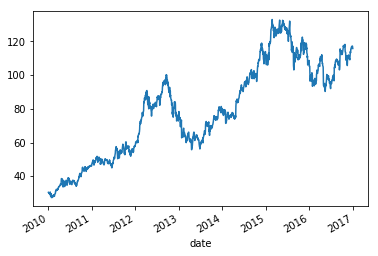

In [47]:
%matplotlib inline
split_adjusted_price[split_adjusted_price['symbol'] == 'AAPL'].close.plot()

<p><a name="sol"></a></p>
# Soluitons

**Exercise 1**

In [151]:
NYC=pd.DataFrame([['Bronx',1.39,42],
                ['Manhattan',1.59,23],
                ['Brooklyn',2.47,71],
                ['Staten Island',0.44,59],
                ['Queens',2.23,109]],columns=['boro','pop','area'])

NYC['density']=NYC['pop']/NYC['area']
NYC=NYC.set_index('boro')
NYC

,pop,area,density
boro,,,
Bronx,1.39,42,0.033095
Manhattan,1.59,23,0.069130
Brooklyn,2.47,71,0.034789
Staten Island,0.44,59,0.007458
Queens,2.23,109,0.020459


**Exercise 3**

In [152]:
NYC3=pd.concat([NYC, new_features], axis = 1)
NYC3

,pop,area,density,geography,high_point,inception
Bronx,1.39,42,0.033095,on mainland,Chapel Farm,1898
Brooklyn,2.47,71,0.034789,on island,Battle Hill,1634
Manhattan,1.59,23,0.069130,is an island,Bennett Park,1624
Queens,2.23,109,0.020459,on island,North Glen Oaks,1683
Staten Island,0.44,59,0.007458,is an island,Todt Hill,1683


**Exercise 4**

In [153]:
NYC4=pd.merge(NYC3.reset_index(),Elevations,left_on='high_point',right_on='location').set_index('index')
NYC4.columns=NYC4.columns.str.replace('elevation','peak_elevation')
NYC4=NYC4.sort_values('peak_elevation',ascending=False)

**Exercise 5**

In [154]:
Employee=Employee.replace('?',np.nan)
Employee
np.sum(Employee.isnull(), axis=1)
np.sum(Employee.isnull(), axis=0)
Employee.loc[Employee.isnull().any(axis=1),:]
Employee.loc[:,Employee.isnull().any(axis=0) ]

,Department,Education,Year
0,IT,Bachelor,1.0
1,IT,Master,2.0
2,HR,Master,2.0
3,HR,Bachelor,2.0
4,Trade,PHD,3.0
5,NaN,PHD,5.0
6,Trade,Master,NaN
7,HR,Master,8.0
8,IT,NaN,9.0


**Exercise 6**

In [155]:
Country.groupby('coastal').agg({'life expectancy':['min','max']})
Country.groupby(['continent','coastal']).agg({'deathrate':['count','mean']})
Country['density']=Country['population']/Country['area']
Country['dense']=Country['density']>Country['density'].mean()
def diff_(x):
    return max(x)-min(x)
Country.groupby('dense').agg({'birthrate':['mean',diff_]})

birthrate      
            mean diff_
dense                 
False  21.687805  29.6
True   17.488235  35.6